# Initial Value Problems for ODEs, Part 2: Runge-Kutta Methods

**Updated (slightly) on Monday March 29.**

**References:**

- Section 6.4 *Runge-Kutta Methods and Applications* of [Sauer](../references.html#Sauer);
in particular Sub-section 6.4.1.
- Section 5.4 *Runge-Kutta Methods* of [Burden&Faires](../references.html#Burden-Faires)
- Sections 7.1 and 7.2 of [Chenney&Kincaid](../references.html#Chenney-Kincaid)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# Shortcuts for some favorite commands:
from numpy import linspace
from matplotlib.pyplot import figure, plot, grid, title, xlabel, ylabel, legend

Introduction
------------

The original Runge-Kutta method is the fourth order accurate one to be described below, which is still used a lot, though with some modifications.

However, the name is now applied to a variety of methods based on a similar strategy, so first, here are a few simpler methods, all of some value, at least for small, low precision calculations.

## Euler's Method as a Runge-Kutta method

The simplest of all methods of this general form is Euler's method.
To set up the notation to be used below, rephrase it this way:

To get from $(t, u)$ to an approximation of $(t+h, u(t+h))$, use the approximation

$$\begin{split}
K_1 &= h f(t, u)
\\
u(t+h) &\approx u + K_1
\end{split}$$

## Second order Runge-Kutta methods

We have seen that the global error of Euler's method is $O(h)$: it is only first order accurate.
This is often insufficient, so it is more common even for small, low precision calculation to use one of several second order methods:

### The Explicit Trapezoid Method (a.k.a. the Improved Euler method or Huen's method)

One could try to adapt the trapezoid method for integrating $f(t)$ to solve $du/dt = f(t)$

$$
u(t + h) = u(t) + \int_{t}^{t + h} f(s) ds \approx u(t) + h \frac{f(t) + f(t+h)}{2}
$$

to solving the ODE $du/dt = f(t, u)$ but there is a problem that needs to be overcome:

we get

$$
u(t + h) \approx u(t) + h \frac{f(t, u(t)) + h f(t+h, u(t+h))}{2}
$$

and inserting the values $U_i \approx u(t_i)$ and so on gives

$$
U_{i+1} \approx U_i + h \frac{f(t_i, U_i) + f(t_{i+1}, U_{i+1}))}{2}
$$

This is known as the **Implicit Trapezoid Rule**, because the value $U_{i+1}$ that we seek appears at the right-hand side too: we only have an *implicit* formula for it.

On one hand, one can in fact use this formula, by solving the equation at each time step for the unknown $U_{i+1}$;
for example, one can use methods seen in earlier sections such as fixed point iteration or the secant method.

We will return to this in a later section;
however, for now we get around this more simply by inserting an approximation at right — the only one we know so far, given by Euler's Method.
That is:

- replace $u(t+h)$ at right by the tangent line approximation $u(t+h) \approx u(t) + hf(t, u(t))$, giving

$$
u(t + h) \approx u(t) + h \frac{f(t, u(t)) + f(t+h, u(t) + hf(t, u(t)))}{2}
$$

and for the formulas in terms of the $U_i$, replace $U_{i+1}$ at right by $U_{i+1} \approx U_i + h f(t_i, U_i)$, giving

$$
U_{i+1} = U_i + h \frac{f(t_i, U_i) + f(t_{i+1}, U_i + h f(t_i, U_i))}{2}
$$

This is the **Explicit Trapezoid Rule**.

It is convenient to break this down into two stages, one for each evaluation of $f(t, u)$:

$$\begin{split}
K_1 &= h f(t, u)
\\
K_2 &= h f(t+h, u + K_1)
\\
u(t+h) &\approx u + \frac{1}{2}(K_1 + K_2)
\end{split}$$

For equal sized time steps, this leads to the algorithm

$$\begin{split}
U_0 &= u_0
\\
U_{i+1} &= U_i + \frac{1}{2}(K_1 + K_2),
\\
&\quad \text{where}
\\
K_1 &= h f(t_i, U_i)
\\
K_2 &= h f(t_{i+1}, U_i + K_1)
\end{split}$$

We will see that, despite the mere first order accuracy of the Euler approximation used in getting $K_2$, this method is second order accurate; the key is the fact that any error in the approximation used for $f(t+h, u(t+h))$ gets multiplied by $h$.

#### Exercise 1

A) Verify that for the simple case where $f(t, u) = f(t)$,
this gives the same result as the composite trapezoid rule for integration.

B) Do one step of this method for the canonical example $du/dt = ku$, $u(t_0) = u_0$.
It will have the form $U_1 = G U_0$ where the growth factor $G$ approximates the factor $g=e^{kh}$ for the exact solution $u(t_1) = g u(t_0)$ of the ODE.

C) Compare to $G=1+kh$ seen for Euler's method.

D) Use the previous result to express $U_i$ in terms of $U_0=u_0$, as done for Euler's method.

In [2]:
def explicitTrapezoid(f, a, b, u_0, n=100, demoMode=False):
    """Use the Explict Trapezoid Method (a.k.a Improved Euler)
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.
    u = np.empty_like(t)
    u[0] = u_0
    for i in range(n):
        K_1 = f(t[i], u[i])*h
        K_2 = f(t[i]+h, u[i]+K_1)*h
        u[i+1] = u[i] + (K_1 + K_2)/2.
    return (t, u)

As always, this function can now also be imported from `numerical_methods_module`, with

    from numerical_methods_module import explicitTrapezoid

### Examples

For all methods in this section, we will solve for versions of Example 2 and 4 in the section
[Solving Initial Value Problems for Ordinary Differential Equations, Part 1](ODE-IVP-1-basics-and-Euler-python.ipynb).

$$
\frac{du}{dt} = f_1(t, u) = K u
$$

with general solution

$$
u(t) = u_1(t; a, u_0) = u_0 e^{t-a}
$$

and

$$
\frac{du}{dt}  = K(\cos(t) - u) - \sin(t)
$$

with general solution

$$
u(t) = u_2(t; a, u_0) = \cos(t) + C e^{-K t},\quad C = (u_0 - \cos(a)) e^{K a}
$$

For comparison to Euler's Method, the same examples are done with it [below](#euler-redux).

In [3]:
def f_1(t, u):
    """The simplest "genuine" ODE, (not just integration)
    The solution is u(t) = u(t; a, u_0) = u_0 exp(t-a)
    """
    return K*u
def u_1(t): return u_0 * np.exp(K*(t-a))

In [4]:
def f_2(t, u):
    """A simple more "generic" test case, with f(t, u) depending on both variables.
    The solution for a=0 is u(t) = u(t; 0, u_0) = cos t + (u_0 - 1) e^(-Kt)
    The solution in general is u(t) = u(t; a, u_0) = cos t + C e^(-K t), C = (u_0 - cos(a)) exp(K a)
    """
    return  K*(np.cos(t) - u) - np.sin(t)
def u_2(t): return np.cos(t) + C * np.exp(-K*t)

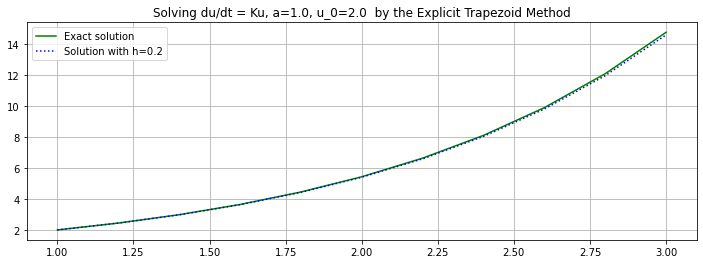

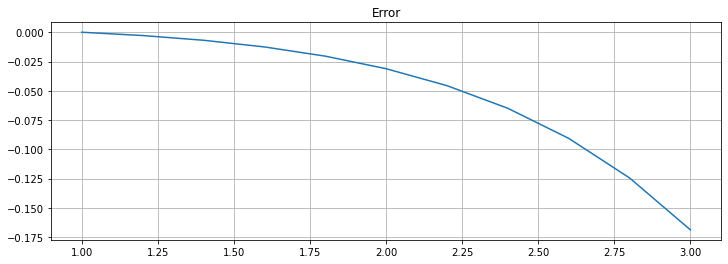

In [5]:
    a = 1.
    b = 3.
    u_0 = 2.
    K = 1.
    n = 10

    (t, U) = explicitTrapezoid(f_1, a, b, u_0, n, demoMode=True)
    h = (b-a)/n
    plt.figure(figsize=[12,4])
    plt.title(f"Solving du/dt = Ku, {a=}, {u_0=}  by the Explicit Trapezoid Method")
    plt.plot(t, u_1(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_1(t))
    plt.grid(True)

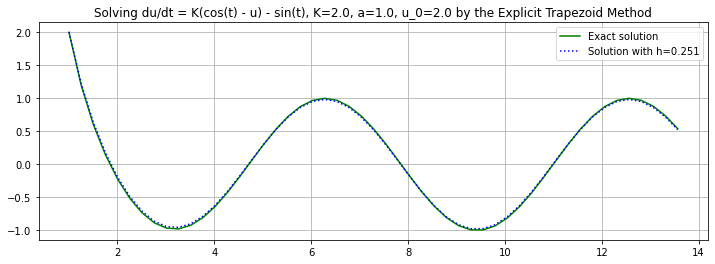

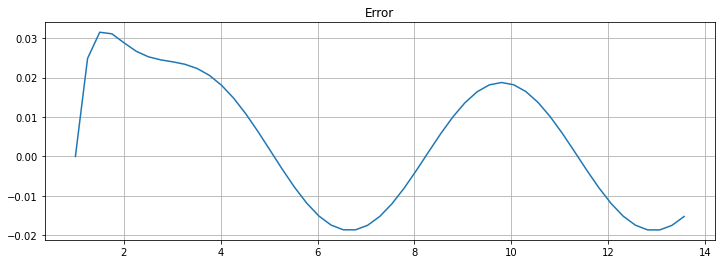

In [6]:
# Demo
if __name__ == "__main__":  # Do this if running the .py file directly, but not when importing [from] it.
    
    def f_2(t, u):
        """A simple more "generic" test case, with f(t, u) depending on both variables.
        The solution for a=0 is u(t) = u(t; 0, u_0) = cos t + (u_0 - 1) e^(-Kt)
        The solution in general is u(t) = u(t; a, u_0) = cos t + C e^(-K t), C = (u_0 - cos(a)) exp(K a)
        """
        return  K*(np.cos(t) - u) - np.sin(t)
    def u_2(t): return np.cos(t) + C * np.exp(-K*t)

    a = 1.
    b = a + 4 * np.pi  # Two periods
    u_0 = 2.
    K = 2.
    n = 50

    (t, U) = explicitTrapezoid(f_2, a, b, u_0, n)
    C = (u_0 - np.cos(a)) * np.exp(K*a)
    h = (b-a)/n
    plt.figure(figsize=[12,4])
    plt.title(f"Solving du/dt = K(cos(t) - u) - sin(t), {K=}, {a=}, {u_0=} by the Explicit Trapezoid Method")
    plt.plot(t, u_2(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)
    
    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_2(t))
    plt.grid(True)

### The Explicit Midpoint Method (a.k.a. Modified Euler)

If we start with the Midpoint Rule for integration in place of the Trapezoid Rule, we similarly get an approximation

$$
u(t + h) \approx u(t) + h f(t + h/2, u(t + h/2))
$$

This has the slight extra complication that it involves three values of $u$ including $u(t+h/2)$ which we are not trying to evaluate.  We deal with that by making yet another approximation, using an average of $u$ values:

$$
u(t+h/2) \approx \frac{u(t) + u(t+h)}{2}
$$

leading to

$$
u(t + h) \approx u(t) + h f\left( t + h/2, \frac{u(t) + u(t+h)}{2} \right)
$$

and in terms of $U_i \approx u(t_i)$, the **Implicit Midpoint Rule**

$$
U_{i+1} = U_i + h f\left( t + h/2, \frac{U_i + U_{i+1}}{2} \right)
$$

We will see late that this is a particularly useful method in some situations, such as long-time solutions of ODEs that describe the motion of physical systems with conservation of momentum, angular momentum and kinetic energy. 

However, for now we again seek a more straightforward *explicit* method; using the same tangent line approximation strategy as above gives the **Explicit Midpoint Rule**

$$\begin{split}
K_1 &= h f(t, u)
\\
K_2 &= h f(t+h/2, u + K_1/2)
\\
u(t+h) &\approx u + K_2
\end{split}$$

and thus for equal-sized time steps, the algorithm

$$\begin{split}
U_0 &= u_0
\\
U_{i+1} &= U_i + K_2
\\
&\quad \text{where}
\\
K_1 &= h f(t_i, U_i)
\\
K_2 &= h f(t_{i}+h/2, U_i + K_1/2)
\end{split}$$

#### Exercise 2 (a lot like Exercise 1)

A) Verify that for the simple case where $f(t, u) = f(t)$,
this give the same result as the composite midpoint rule for integration (same comment as above).

B) Do one step of this method for the canonical example $du/dt = ku$, $u(t_0) = u_0$.
It will have the form $U_1 = G U_0$ where the growth factor $G$ approximates the factor $g=e^{kh}$ for the exact solution $u(t_1) = g u(t_0)$ of the ODE.

C) Compare to the growth factors $G$ seen for previous methods, and to the growth factor $g$ for the exact solution.

#### Exercise 3

A) Apply Richardson extrapolation to one step of Euler's method, using the values given by step sizes $h$ and $h/2$.

B) This should give a second order accurate method, so compare it to the above two methods.

In [7]:
def explicitMidpoint(f, a, b, u_0, n=100, demoMode=False):
    """Use the Explicit Midpoint Method (a.k.a Modified Euler)
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.
    u = np.empty_like(t)
    u[0] = u_0
    for i in range(n):
        K_1 = f(t[i], u[i])*h
        K_2 = f(t[i]+h/2, u[i]+K_1/2)*h
        u[i+1] = u[i] + K_2
    return (t, u)

Again, available for import with

    from numerical_methods_module import explicitMidpoint

### Examples

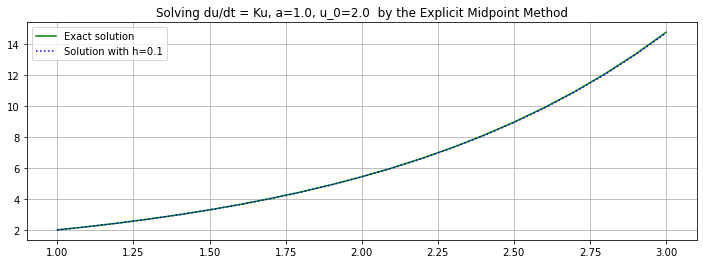

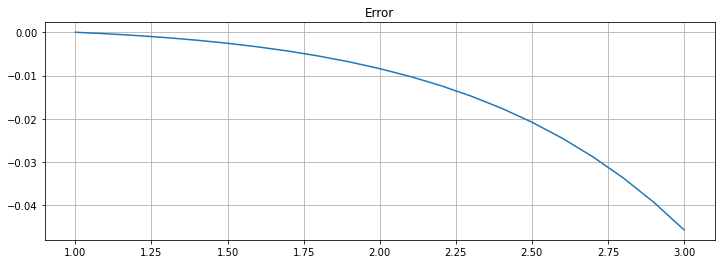

In [16]:
    a = 1.
    b = 3.
    u_0 = 2.
    K = 1.
    n = 20

    (t, U) = explicitMidpoint(f_1, a, b, u_0, n, demoMode=True)
    h = (b-a)/n
    plt.figure(figsize=[12,4])
    plt.title(f"Solving du/dt = Ku, {a=}, {u_0=}  by the Explicit Midpoint Method")
    plt.plot(t, u_1(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_1(t))
    plt.grid(True)

**Observation:** The errors are very similar to those for the Explicit Trapezoid Method, not "half as much and of opposite sign" as seen with integration; the exercises give a hint as to why this is so.

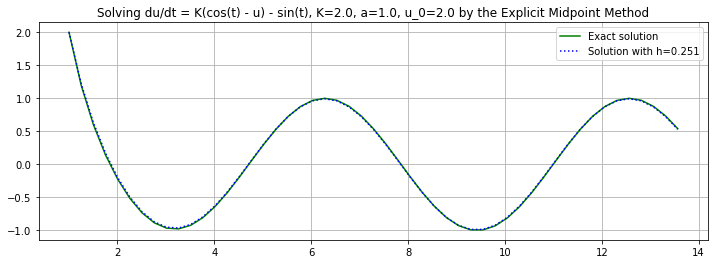

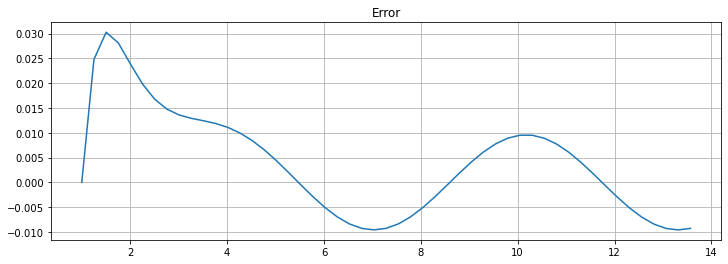

In [9]:
    a = 1.
    b = a + 4 * np.pi  # Two periods
    u_0 = 2.
    K = 2.
    n = 50

    (t, U) = explicitMidpoint(f_2, a, b, u_0, n)
    C = (u_0 - np.cos(a)) * np.exp(K*a)
    h = (b-a)/n
    plt.figure(figsize=[12,4])
    plt.title(f"Solving du/dt = K(cos(t) - u) - sin(t), {K=}, {a=}, {u_0=} by the Explicit Midpoint Method")
    plt.plot(t, u_2(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)
    
    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_2(t))
    plt.grid(True)

**Observation:** This time, the errors are slightly better than for the Explicit Trapezoid Method but still not "half as much " as seen with integration; this is because this equation has a mix of integration (the "sin" and "cos" parts) and exponential growth (the "Ku" part.)

## The "Classical", Fourth Order Accurate, Runge-Kutta Method

This is the original Runge-Kutta method:

$$\begin{split}
K_1 &= h f(t, u)
\\
K_2 &= h f(t + h/2, u + K_1/2)
\\
K_3 &= h f(t + h/2, u + K_2/2)
\\
K_4 &= h f(t + h, u + K_3)
\\
u(t+h) &\approx u + \frac{1}{6}(K_1 + 2 K_2 + 2 K_3 + K_4)
\end{split}$$

This — or rather some variants to estimate and contol errors — is perhaps the most widely used general purpose method for numerical solution of ODE IVP's.

The derivation of this is far more complicated than for the other methods above, and is omitted.
For now, we will instead assess its accuracy "*a postiori*", through the next exercise and some examples.

### Exercise 4

A) Verify that for the simple case where $f(t, u) = f(t)$,
this gives the same result as the composite ximpson's Rule for integration.

B) Do one step of this method for the canonical example $du/dt = ku$, $u(t_0) = u_0$.
It will have the form $U_1 = G U_0$ where the growth factor $G$ approximates the factor $g=e^{kh}$ for the exact solution $u(t_1) = g u(t_0)$ of the ODE.

C) Compare to the growth factors $G$ seen for previous methods, and to the growth factor $g$ for the exact solution.

In [10]:
def RungeKutta(f, a, b, u_0, n=100, demoMode=False):
    """Use the (classical) Runge-Kutta Method
    to solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0"""
    h = (b-a)/n
    t = np.linspace(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.
    u = np.empty_like(t)
    u[0] = u_0
    for i in range(n):
        K_1 = f(t[i], u[i])*h
        K_2 = f(t[i]+h/2, u[i]+K_1/2)*h
        K_3 = f(t[i]+h/2, u[i]+K_2/2)*h
        K_4 = f(t[i]+h, u[i]+K_3)*h
        u[i+1] = u[i] + (K_1 + 2*K_2 + 2*K_3 + K_4)/6
    return (t, u)

Yet again, available for import with

    from numerical_methods_module import RungeKutta

### Examples

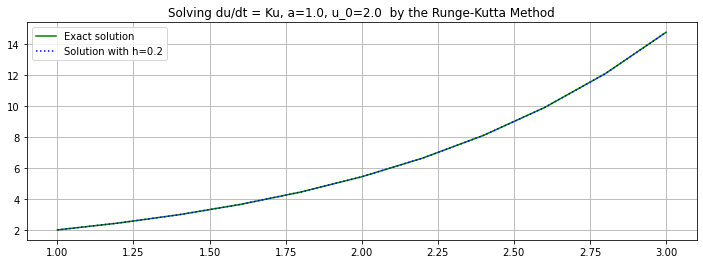

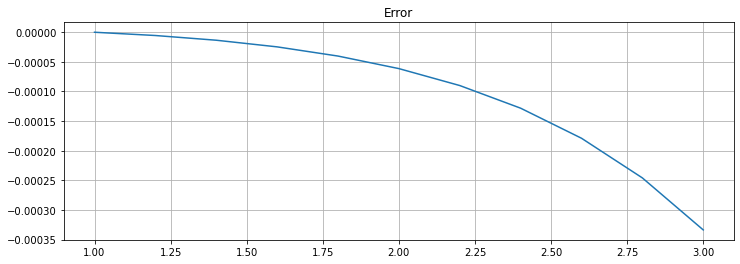

In [11]:
    a = 1.
    b = 3.
    u_0 = 2.
    K = 1.
    n = 10

    (t, U) = RungeKutta(f_1, a, b, u_0, n, demoMode=True)
    h = (b-a)/n
    plt.figure(figsize=[12,4])
    plt.title(f"Solving du/dt = Ku, {a=}, {u_0=}  by the Runge-Kutta Method")
    plt.plot(t, u_1(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_1(t))
    plt.grid(True)

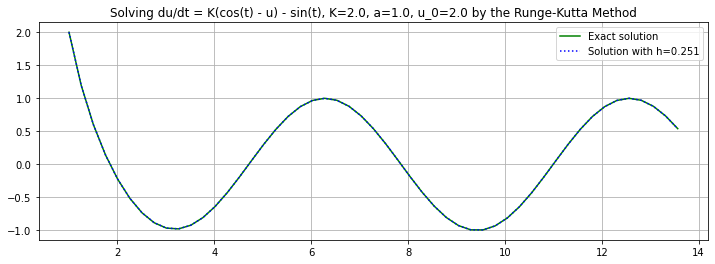

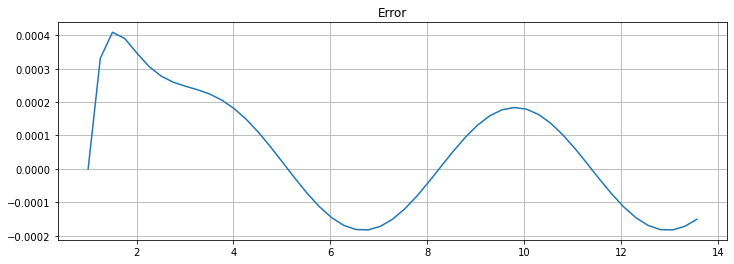

In [12]:
    a = 1.
    b = a + 4 * np.pi  # Two periods
    u_0 = 2.
    K = 2.
    n = 50

    (t, U) = RungeKutta(f_2, a, b, u_0, n)
    C = (u_0 - np.cos(a)) * np.exp(K*a)
    h = (b-a)/n
    plt.figure(figsize=[12,4])
    plt.title(f"Solving du/dt = K(cos(t) - u) - sin(t), {K=}, {a=}, {u_0=} by the Runge-Kutta Method")
    plt.plot(t, u_2(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Solution with h={h:0.3}")
    plt.legend()
    plt.grid(True)
    
    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_2(t))
    plt.grid(True)

<a name="euler-redux"></a>
## For comparison: the above examples done with Euler's Method

In [13]:
from numerical_methods_module import euler

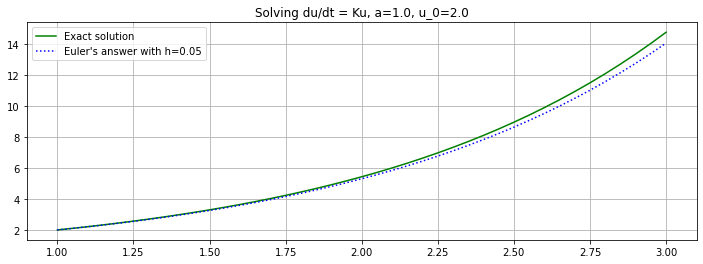

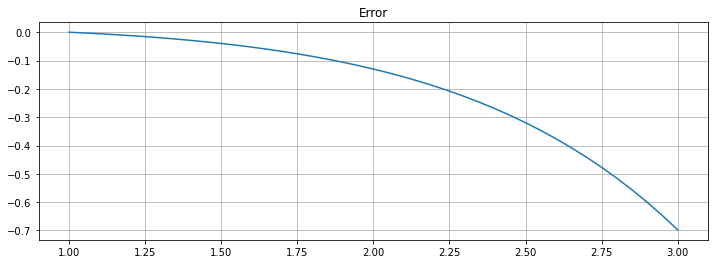

In [14]:
    a = 1.
    b = 3.
    u_0 = 2.
    K = 1.0
    n = 40

    (t, U) = euler(f_1, a, b, u_0, n)
    h = (b-a)/n
    plt.figure(figsize=[12,4])
    plt.title(f"Solving du/dt = Ku, {a=}, {u_0=}")
    plt.plot(t, u_1(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Euler's answer with h={h:0.3}")
    plt.legend()
    plt.grid(True)

    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_1(t))
    plt.grid(True)

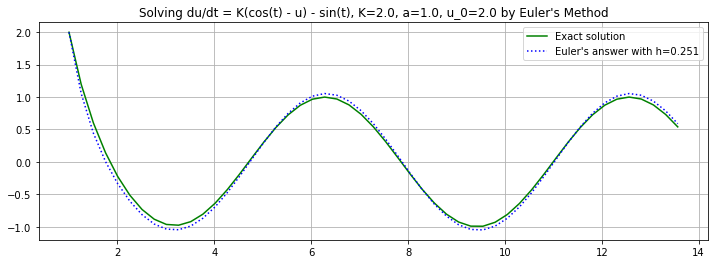

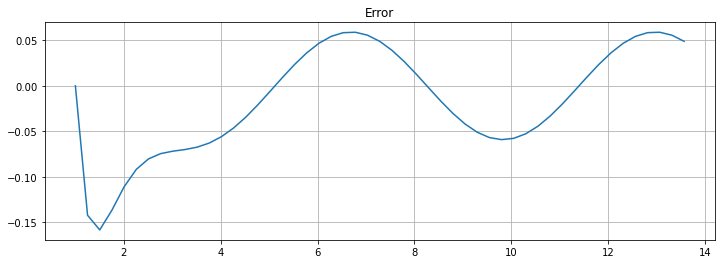

In [15]:
    a = 1.
    b = a + 4 * np.pi  # Two periods
    u_0 = 2.
    K = 2.
    n = 50

    (t, U) = euler(f_2, a, b, u_0, n)
    C = (u_0 - np.cos(a)) * np.exp(K*a)
    h = (b-a)/n
    plt.figure(figsize=[12,4])
    plt.title(f"Solving du/dt = K(cos(t) - u) - sin(t), {K=}, {a=}, {u_0=} by Euler's Method")
    plt.plot(t, u_2(t), 'g', label="Exact solution")
    plt.plot(t, U, 'b:', label=f"Euler's answer with h={h:0.3}")
    plt.legend()
    plt.grid(True)
    
    plt.figure(figsize=[12,4])
    plt.title(f"Error")
    plt.plot(t, U - u_2(t))
    plt.grid(True)

---
This work is licensed under [Creative Commons Attribution-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)